In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [84]:
%cd '/content/drive/MyDrive/Final project'
!ls

/content/drive/MyDrive/Final project
 BACE1-DRAGON-export.csv  'Screening BACE1.ipynb'
 newdata.csv		  'Screening BACE1-máy hiền.ipynb'


In [28]:
import pandas as pd
import numpy as np
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
# from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
data = pd.read_csv('BACE1-DRAGON-export.csv')

In [30]:
print(data.shape)

(2602, 3766)


In [31]:
print(data.dtypes)

ID                object
NAME              object
MW               float64
AMW              float64
Sv               float64
                  ...   
Neoplastic-80      int64
Neoplastic-50      int64
Infective-80       int64
Infective-50       int64
logIC50          float64
Length: 3766, dtype: object


In [32]:
data.head()

,ID,NAME,MW,AMW,Sv,Se,Sp,Si,Mv,Me,Mp,Mi,nAT,nSK,nBT,nBO,nBM,SCBO,RBN,RBF,nDB,nTB,nAB,nH,nC,nN,nO,nP,nS,nF,nCL,nBR,nI,nB,nHM,nHet,nX,H%,C%,N%,...,ALOGP,ALOGP2,SAtot,SAacc,SAdon,Vx,VvdwMG,VvdwZAZ,PDI,BLTF96,BLTD48,BLTA96,cRo5,DLS_01,DLS_02,DLS_03,DLS_04,DLS_05,DLS_06,DLS_07,DLS_cons,LLS_01,LLS_02,CMC-80,CMC-50,Inflammat-80,Inflammat-50,Depressant-80,Depressant-50,Psychotic-80,Psychotic-50,Hypertens-80,Hypertens-50,Hypnotic-80,Hypnotic-50,Neoplastic-80,Neoplastic-50,Infective-80,Infective-50,logIC50
0,BACE-1.smi.1,CHEMBL473159,126.12,8.408,9.725,15.633,9.648,16.874,0.648,1.042,0.643,1.125,15,9,15,9,6,12.0,0,0.000,0,0,6,6,6,0,3,0,0,0,0,0,0,0,0,3,0,40.0,40.0,0.0,...,1.028,1.056,191.792,128.050,128.050,148.256,64.138,107.55,0.773,-1.67,-1.63,-1.56,1,1.0,0.67,0.83,0.6,0.0,1.0,1.0,0.73,0.83,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.504245
1,BACE-1.smi.2,CHEMBL3261080,129.21,8.614,9.305,15.149,10.188,17.245,0.620,1.010,0.679,1.150,15,8,15,8,2,10.0,0,0.000,2,0,0,7,4,3,0,0,1,0,0,0,0,0,1,4,0,46.7,26.7,20.0,...,-0.087,0.008,164.951,66.223,50.785,156.229,67.405,111.63,0.947,-1.67,-1.63,-1.56,1,1.0,0.67,0.83,0.8,0.0,1.0,1.0,0.76,0.83,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15.919645
2,BACE-1.smi.3,CHEMBL4096411,153.16,8.509,11.547,18.727,11.449,20.744,0.642,1.040,0.636,1.152,18,11,19,12,3,15.0,0,0.000,3,0,0,7,6,3,2,0,0,0,0,0,0,0,0,5,0,38.9,33.3,16.7,...,-1.445,2.087,176.585,102.712,54.032,170.199,73.131,130.30,0.964,-0.67,-0.52,-0.39,1,1.0,0.67,0.83,0.7,0.0,1.0,1.0,0.74,0.67,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.318903
3,BACE-1.smi.4,CHEMBL235825,153.21,6.964,12.886,22.167,13.517,25.365,0.586,1.008,0.614,1.153,22,11,22,11,3,14.0,2,0.091,3,0,0,11,7,3,1,0,0,0,0,0,0,0,0,4,0,50.0,31.8,13.6,...,0.505,0.255,214.962,90.003,50.908,201.894,86.120,151.17,0.939,-2.10,-2.11,-2.06,1,1.0,0.83,0.83,1.0,1.0,1.0,1.0,0.95,0.67,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14.727793
4,BACE-1.smi.5,CHEMBL3261081,164.25,8.645,12.810,18.931,13.943,21.162,0.674,0.996,0.734,1.114,19,11,20,12,7,16.0,0,0.000,1,0,6,8,8,2,0,0,1,0,0,0,0,0,1,3,0,42.1,42.1,10.5,...,1.929,3.719,196.051,48.457,32.897,200.947,85.732,141.29,1.025,-2.79,-2.88,-2.87,1,1.0,0.67,0.83,0.6,0.0,1.0,1.0,0.73,0.83,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,13.579788


In [33]:
print('Tổng số giá trị NaN trong DataFrame', data.isnull().sum().sum())
print(data.isnull().any())

Tổng số giá trị NaN trong DataFrame 640
ID               False
NAME             False
MW               False
AMW              False
Sv                True
                 ...  
Neoplastic-80    False
Neoplastic-50    False
Infective-80     False
Infective-50     False
logIC50          False
Length: 3766, dtype: bool


In [34]:
data=data.dropna(axis = 1)

In [35]:
data

,ID,NAME,MW,AMW,Se,Sp,Si,Me,Mp,Mi,nAT,nSK,nBT,nBO,nBM,SCBO,RBN,RBF,nDB,nTB,nAB,nH,nC,nN,nO,nP,nS,nF,nCL,nBR,nI,nB,nHM,nHet,nX,H%,C%,N%,O%,X%,...,TPSA(NO),TPSA(Tot),MLOGP,MLOGP2,ALOGP,ALOGP2,Vx,VvdwMG,VvdwZAZ,BLTF96,BLTD48,BLTA96,cRo5,DLS_01,DLS_02,DLS_03,DLS_04,DLS_05,DLS_06,DLS_07,DLS_cons,LLS_01,LLS_02,CMC-80,CMC-50,Inflammat-80,Inflammat-50,Depressant-80,Depressant-50,Psychotic-80,Psychotic-50,Hypertens-80,Hypertens-50,Hypnotic-80,Hypnotic-50,Neoplastic-80,Neoplastic-50,Infective-80,Infective-50,logIC50
0,BACE-1.smi.1,CHEMBL473159,126.12,8.408,15.633,9.648,16.874,1.042,0.643,1.125,15,9,15,9,6,12.0,0,0.000,0,0,6,6,6,0,3,0,0,0,0,0,0,0,0,3,0,40.0,40.0,0.0,20.0,0.0,...,60.69,60.69,0.325,0.106,1.028,1.056,148.256,64.138,107.55,-1.67,-1.63,-1.56,1,1.00,0.67,0.83,0.6,0.0,1.00,1.0,0.73,0.83,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.504245
1,BACE-1.smi.2,CHEMBL3261080,129.21,8.614,15.149,10.188,17.245,1.010,0.679,1.150,15,8,15,8,2,10.0,0,0.000,2,0,0,7,4,3,0,0,1,0,0,0,0,0,1,4,0,46.7,26.7,20.0,0.0,0.0,...,54.70,82.94,0.331,0.110,-0.087,0.008,156.229,67.405,111.63,-1.67,-1.63,-1.56,1,1.00,0.67,0.83,0.8,0.0,1.00,1.0,0.76,0.83,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15.919645
2,BACE-1.smi.3,CHEMBL4096411,153.16,8.509,18.727,11.449,20.744,1.040,0.636,1.152,18,11,19,12,3,15.0,0,0.000,3,0,0,7,6,3,2,0,0,0,0,0,0,0,0,5,0,38.9,33.3,16.7,11.1,0.0,...,70.23,70.23,-0.842,0.709,-1.445,2.087,170.199,73.131,130.30,-0.67,-0.52,-0.39,1,1.00,0.67,0.83,0.7,0.0,1.00,1.0,0.74,0.67,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.318903
3,BACE-1.smi.4,CHEMBL235825,153.21,6.964,22.167,13.517,25.365,1.008,0.614,1.153,22,11,22,11,3,14.0,2,0.091,3,0,0,11,7,3,1,0,0,0,0,0,0,0,0,4,0,50.0,31.8,13.6,4.5,0.0,...,71.77,71.77,0.835,0.697,0.505,0.255,201.894,86.120,151.17,-2.10,-2.11,-2.06,1,1.00,0.83,0.83,1.0,1.0,1.00,1.0,0.95,0.67,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14.727793
4,BACE-1.smi.5,CHEMBL3261081,164.25,8.645,18.931,13.943,21.162,0.996,0.734,1.114,19,11,20,12,7,16.0,0,0.000,1,0,6,8,8,2,0,0,1,0,0,0,0,0,1,3,0,42.1,42.1,10.5,0.0,0.0,...,38.38,63.68,1.642,2.695,1.929,3.719,200.947,85.732,141.29,-2.79,-2.88,-2.87,1,1.00,0.67,0.83,0.6,0.0,1.00,1.0,0.73,0.83,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,13.579788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2597,BACE-1.smi.2598,CHEMBL3813928,979.32,6.801,144.901,88.626,164.201,1.006,0.615,1.140,144,70,146,72,21,87.0,28,0.192,9,0,12,74,50,8,12,0,0,0,0,0,0,0,0,20,0,51.4,34.7,5.6,8.3,0.0,...,287.18,287.18,-0.705,0.498,2.156,4.649,1276.678,526.606,968.56,-0.79,-0.65,-0.52,0,0.25,0.33,0.33,0.6,1.0,0.17,0.0,0.38,0.17,0.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.536692
2598,BACE-1.smi.2599,CHEMBL2181015,979.32,6.801,144.901,88.626,164.201,1.006,0.615,1.140,144,70,146,72,21,87.0,27,0.185,9,0,12,74,50,8,12,0,0,0,0,0,0,0,0,20,0,51.4,34.7,5.6,8.3,0.0,...,287.18,287.18,-0.705,0.498,2.010,4.040,1276.678,526.606,968.56,-0.79,-0.65,-0.52,0,0.25,0.33,0.33,0.6,1.0,0.17,0.0,0.38,0.17,0.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.382027
2599,BACE-1.smi.2600,CHEMBL2181022,1041.39,6.897,151.784,94.387,171.616,1.005,0.625,1.137,151,75,154,78,27,96.0,29,0.188,9,0,18,76,55,8,12,0,0,0,0,0,0,0,0,20,0,50.3,36.4,5.3,7.9,0.0,...,276.18,276.18,0.267,0.072,4.318,18.643,1354.236,558.392,1023.88,-1.62,-1.57,-1.50,0,0.25,0.33,0.33,0.7,1.0,0.17,0.0,0.40,0.17,0.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.992681
2600,BACE-1.smi.2601,CHEMBL506814,1084.76,10.234,114.189,72.295,118.095,1.077,0.682,1.114,106,78,116,88,42,112.0,0,0.000,6,0,36,28,48,0,30,0,0,0,0,0,0,0,0,30,0,26.4,45.3,0.0,28.3,0.0,...,518.76,518.76,-5.947,35.361,2.999,8.996,1064.153,439.505,830.34,3.66,4.33,4.72,0,0.25,0.00,0.33,0.2,0.5,0.33,0.5,0.30,0.33,0.38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.016157


In [36]:
data.isnull().sum().sum()

0

In [37]:
# descriptions
set_option('precision', 3)
print(data.describe())

             MW       AMW        Se  ...  Infective-80  Infective-50   logIC50
count  2602.000  2602.000  2602.000  ...      2602.000      2602.000  2602.000
mean    451.951     8.349    56.341  ...         0.562         0.075     5.374
std     104.393     1.083    16.484  ...         0.496         0.263     2.949
min     126.120     5.756    15.149  ...         0.000         0.000    -1.609
25%     392.820     7.560    46.567  ...         0.000         0.000     3.298
50%     434.470     8.297    51.696  ...         1.000         0.000     4.970
75%     490.373     9.121    60.109  ...         1.000         0.000     7.650
max    1652.070    12.211   238.530  ...         1.000         1.000    15.920

[8 rows x 3594 columns]


In [38]:
array = data.values
X = array[:, 2:3595]
Y = array[:, 3595]
validation_size = 0.20
seed = 42
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [39]:
X_train.shape, X_validation.shape

((2081, 3593), (521, 3593))

In [40]:
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

In [55]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [56]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



LR: -7436.087867 (15030.808524)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 4430.095587021045, tolerance: 1.6874856200119366

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 4442.722848868778, tolerance: 1.6677518739420452

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 4490.090367916887, toleranc

LASSO: -19.541308 (43.753719)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 4118.396538458033, tolerance: 1.6874856200119366

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 4135.634594157966, tolerance: 1.6677518739420452

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 4171.158159414979, tolerance: 1.6968765951192117

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 4132.387307748646, tolerance: 1.693424

EN: -20.663502 (48.442808)
KNN: -5.719693 (0.461732)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



CART: -4.785775 (1.014379)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



SVR: -8.048538 (1.095006)


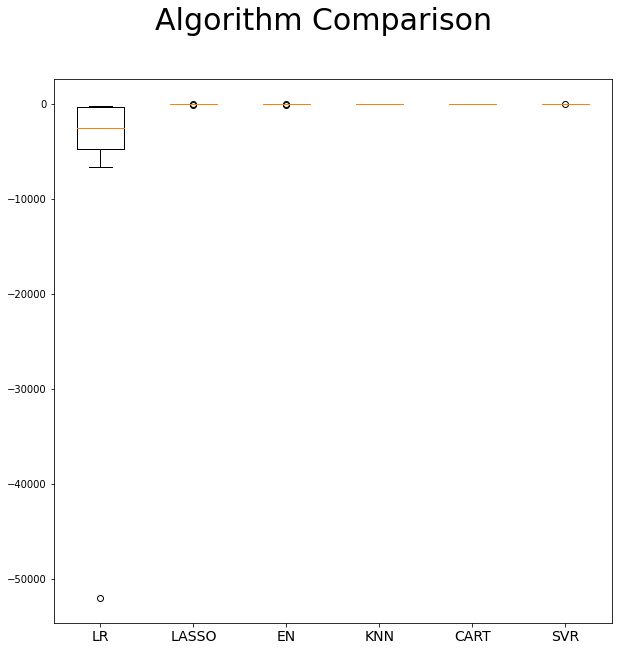

In [58]:
fig = pyplot.figure(figsize=(10, 10))
fig.suptitle('Algorithm Comparison', size=30)
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names, size=14)
pyplot.show()

In [59]:
#standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



ScaledLR: -8723746966732931072.000000 (10218199296167917568.000000)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



ScaledLASSO: -7.130866 (0.811825)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



ScaledEN: -5.221277 (0.527981)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



ScaledKNN: -2.870006 (0.469866)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



ScaledCART: -4.819138 (0.986721)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



ScaledSVR: -2.972996 (0.407675)


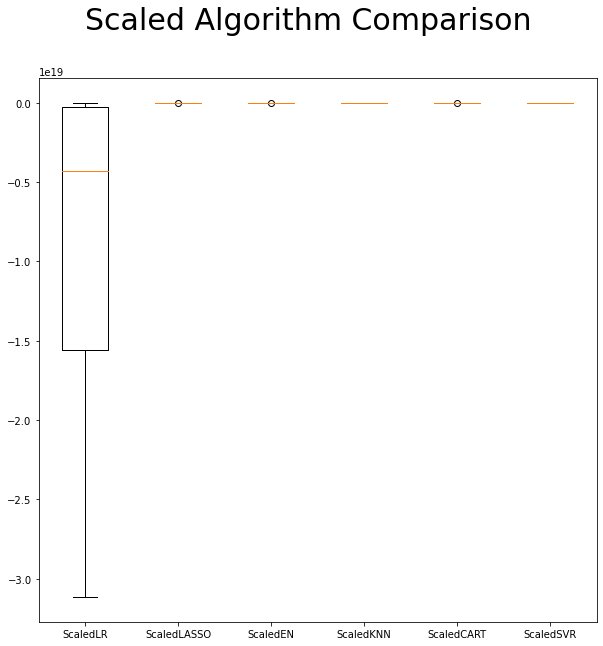

In [61]:
fig = pyplot.figure(figsize=(10, 10))
fig.suptitle('Scaled Algorithm Comparison', size = 30)
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [62]:
# Standardize the dataset and reduct demension 
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('pca', PCA(n_components=25)),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('pca', PCA(n_components=25)),('LASSO',Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('pca', PCA(n_components=25)),('EN',ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('pca', PCA(n_components=25)),('KNN',KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('pca', PCA(n_components=25)),('CART',DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('pca', PCA(n_components=25)),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



ScaledLR: -4.758156 (0.454006)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



ScaledLASSO: -5.371169 (0.460760)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



ScaledEN: -4.945050 (0.444963)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



ScaledKNN: -3.074000 (0.501668)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



ScaledCART: -6.085380 (0.551957)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



ScaledSVR: -3.609309 (0.438119)


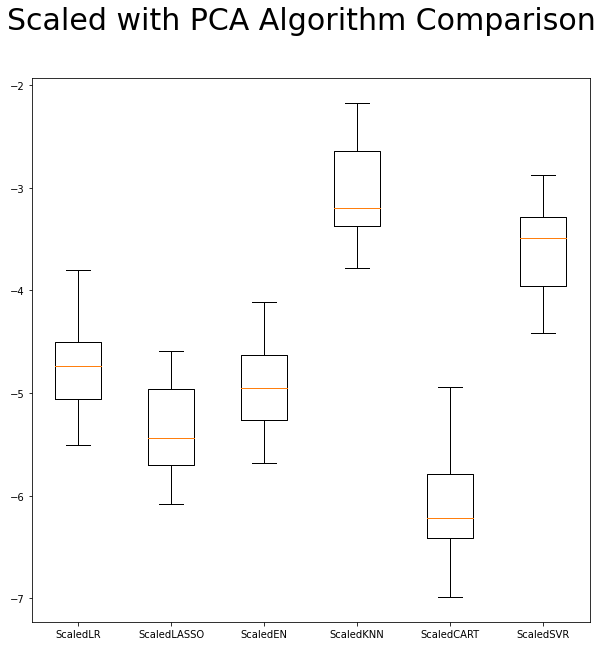

In [64]:
# Compare Algorithms
fig = pyplot.figure(figsize=(10, 10))
fig.suptitle('Scaled with PCA Algorithm Comparison',size =30)
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [95]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best: -2.834621 using {'n_neighbors': 3}
-3.539304 (0.598500) with: {'n_neighbors': 1}
-2.834621 (0.481814) with: {'n_neighbors': 3}
-2.846904 (0.479265) with: {'n_neighbors': 5}
-2.954731 (0.428961) with: {'n_neighbors': 7}
-3.066079 (0.471887) with: {'n_neighbors': 9}
-3.129923 (0.446018) with: {'n_neighbors': 11}
-3.226806 (0.471574) with: {'n_neighbors': 13}
-3.307918 (0.478700) with: {'n_neighbors': 15}
-3.417713 (0.505062) with: {'n_neighbors': 17}
-3.518682 (0.515106) with: {'n_neighbors': 19}
-3.613947 (0.507972) with: {'n_neighbors': 21}


In [65]:
 # ensembles
ensembles = []
# boosting
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('pca', PCA(n_components=15)),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('pca', PCA(n_components=15)),('GBM', GradientBoostingRegressor())])))
# bagging
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('pca', PCA(n_components=15)),('RF',RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('pca', PCA(n_components=15)),('ET',ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



ScaledAB: -5.154163 (0.369301)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



ScaledGBM: -3.738144 (0.389552)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



ScaledRF: -3.144699 (0.417749)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



ScaledET: -2.813258 (0.339643)


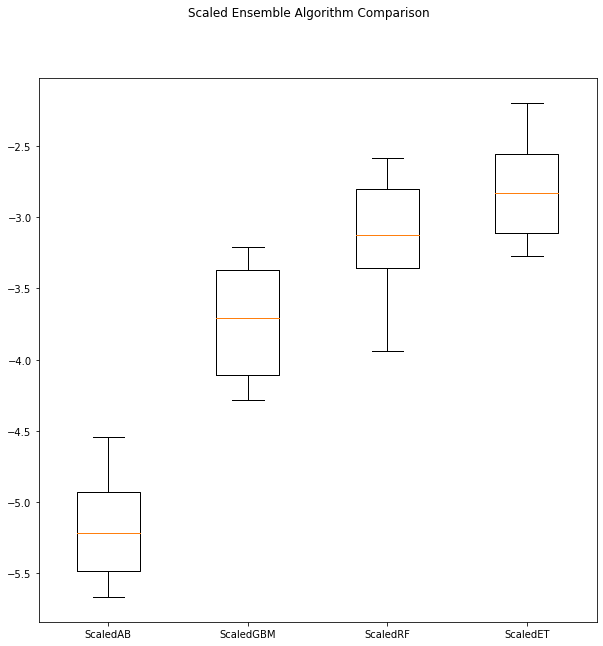

In [68]:
 fig = pyplot.figure(figsize=(10, 10))
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,150,200,250]))
model =  ExtraTreesRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [69]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = ExtraTreesRegressor(random_state=seed, n_estimators=200)
model.fit(rescaledX, Y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=200, n_jobs=None, oob_score=False,
                    random_state=7, verbose=0, warm_start=False)

In [70]:
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

1.775011968794146


In [75]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model2 = KNeighborsRegressor(n_neighbors=3)
model2.fit(rescaledX, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [76]:
rescaledValidationX = scaler.transform(X_validation)
predictions = model2.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

2.3206230640501095


In [ ]:
# DONE